<a href="https://colab.research.google.com/github/aligilbert/AliData/blob/master/CAVIAR_network_clustering_and_betweenness_centrality_networks_normalized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import networkx as nx  # Import networkx as nx
import itertools
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

phases = {}
G = {}
for i in range(1,12):
  var_name = "phase" + str(i)
  file_name = "https://raw.githubusercontent.com/ragini30/Networks-Homework/main/" + var_name + ".csv"
  phases[i] = pd.read_csv(file_name, index_col = ["players"])
  phases[i].columns = "n" + phases[i].columns
  phases[i].index = phases[i].columns
  phases[i][phases[i] > 0] = 1
  G[i] = nx.from_pandas_adjacency(phases[i])
  G[i].name = var_name


In [2]:
print(G[1].nodes)
print(G[1].edges)

['n1', 'n4', 'n89', 'n83', 'n3', 'n5', 'n88', 'n85', 'n90', 'n2', 'n7', 'n54', 'n6', 'n64', 'n8']
[('n1', 'n4'), ('n1', 'n89'), ('n1', 'n83'), ('n1', 'n3'), ('n1', 'n5'), ('n1', 'n88'), ('n1', 'n85'), ('n1', 'n90'), ('n1', 'n2'), ('n1', 'n54'), ('n1', 'n64'), ('n1', 'n8'), ('n89', 'n7'), ('n83', 'n6'), ('n3', 'n88'), ('n88', 'n85'), ('n88', 'n6'), ('n85', 'n6')]


In [3]:
# prompt: now make a matrix with phase number as columns and nodes listed in ascending order (n1, n2, n3, n4, n5, n6, n7, etc) as rows, use a null if the node is not present in the phase. Here are the conditions: sort_key function extracts all sequences of digits (\d+) and non-digits (\D+) from each string.
# It converts the digit sequences to integers so they can be sorted numerically

import pandas as pd
import networkx as nx  # Import networkx as nx
import itertools
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

phases = {}
G = {}
for i in range(1,12):
  var_name = "phase" + str(i)
  file_name = "https://raw.githubusercontent.com/ragini30/Networks-Homework/main/" + var_name + ".csv"
  phases[i] = pd.read_csv(file_name, index_col = ["players"])
  phases[i].columns = "n" + phases[i].columns
  phases[i].index = phases[i].columns
  phases[i][phases[i] > 0] = 1
  G[i] = nx.from_pandas_adjacency(phases[i])
  G[i].name = var_name

nodes = sorted(G[1].nodes, key=lambda x: int(x[1:]))

phase_matrix = pd.DataFrame(columns=[f"phase{i}" for i in range(1, 12)], index=nodes)
for i in range(1, 12):
  for node in nodes:
    if node in G[i].nodes:
      phase_matrix.loc[node, f"phase{i}"] = 1
    else:
      phase_matrix.loc[node, f"phase{i}"] = np.nan

print(phase_matrix)


    phase1 phase2 phase3 phase4 phase5 phase6 phase7 phase8 phase9 phase10  \
n1       1      1      1      1      1      1      1      1      1       1   
n2       1      1      1      1      1      1      1      1      1     NaN   
n3       1      1      1      1      1      1      1      1      1       1   
n4       1    NaN      1      1      1      1      1      1    NaN       1   
n5       1      1      1      1      1      1      1    NaN    NaN     NaN   
n6       1      1      1      1      1      1      1      1      1     NaN   
n7       1      1      1      1      1    NaN    NaN    NaN      1     NaN   
n8       1      1      1      1      1      1      1      1      1       1   
n54      1    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN   
n64      1      1    NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN   
n83      1      1      1      1      1      1      1      1      1       1   
n85      1      1      1      1      1      1      1      1     

In [4]:
print(G[1])

Graph named 'phase1' with 15 nodes and 18 edges


In [8]:
 num_nodes = len(G[i].nodes())

    # Calculate clustering coefficient
clustering_coefficient = nx.average_clustering(G[i])

    # Calculate mean centrality score (example with degree centrality)
centrality_scores = nx.degree_centrality(G[i]).values()
mean_centrality = sum(centrality_scores) / len(centrality_scores)

    # Append statistics to list
graph_stats.append({
        'Phase': var_name,
        'Number_of_nodes': num_nodes,
        'Clustering_coefficient': clustering_coefficient,
        'Mean_centrality_score': mean_centrality
    })

# Convert list of dictionaries to pandas DataFrame
df = pd.DataFrame(graph_stats)

# Display the DataFrame
print(df)

NameError: name 'graph_stats' is not defined

In [ ]:
print

In [10]:
x = nx.betweenness_centrality(G[i], normalized = True)

In [11]:
 formatted_output = f"G(i):\n"

In [12]:
# Iterate over each item in the data list
for node, betweenness_centrality in x.items():
  formatted_output += f"'{node}': {betweenness_centrality}\n"

# Print the formatted output
# Calculate betweenness centrality for Phase 9
betweenness_centrality_phase9 = nx.betweenness_centrality(G[9])

# Print results with phase number
print("Phase 9 Betweenness Centralities:")
for node, betweenness in betweenness_centrality_phase9.items():
    print(f"Node '{node}': {betweenness}")

Phase 9 Betweenness Centralities:
Node 'n1': 0.2490530303030303
Node 'n89': 0.0
Node 'n83': 0.0
Node 'n3': 0.5762310606060607
Node 'n88': 0.0
Node 'n85': 0.06060606060606061
Node 'n90': 0.0
Node 'n2': 0.0
Node 'n7': 0.08775252525252526
Node 'n6': 0.0
Node 'n8': 0.0
Node 'n76': 0.13194444444444445
Node 'n11': 0.0
Node 'n13': 0.0
Node 'n12': 0.3573232323232323
Node 'n14': 0.0
Node 'n18': 0.0
Node 'n17': 0.0
Node 'n82': 0.11568813131313133
Node 'n78': 0.025883838383838384
Node 'n87': 0.2362689393939394
Node 'n79': 0.0625
Node 'n16': 0.0
Node 'n81': 0.0
Node 'n59': 0.0
Node 'n37': 0.0
Node 'n36': 0.0
Node 'n96': 0.038983585858585856
Node 'n46': 0.0
Node 'n29': 0.0
Node 'n30': 0.019886363636363636
Node 'n105': 0.0
Node 'n101': 0.0
Node 'n41': 0.0


In [13]:
# Iterate over each item in the data list
for node, betweenness_centrality in x.items():
  formatted_output += f"'{node}': {betweenness_centrality}\n"

# Print the formatted output
# Calculate betweenness centrality for Phase 3
betweenness_centrality_phase3 = nx.betweenness_centrality(G[3])

# Print results with phase number
print("Phase 3 Betweenness Centralities:")
for node, betweenness in betweenness_centrality_phase3.items():
    print(f"Node '{node}': {betweenness}")

Phase 3 Betweenness Centralities:
Node 'n1': 0.829502688172043
Node 'n4': 0.0
Node 'n89': 0.0
Node 'n83': 0.046572580645161295
Node 'n3': 0.09549731182795697
Node 'n5': 0.0625
Node 'n48': 0.0
Node 'n88': 0.0006720430107526881
Node 'n85': 0.029973118279569885
Node 'n90': 0.0
Node 'n86': 0.028024193548387095
Node 'n2': 0.0010080645161290322
Node 'n7': 0.0
Node 'n6': 0.03333333333333333
Node 'n8': 0.0
Node 'n55': 0.0
Node 'n10': 0.0
Node 'n56': 0.0
Node 'n76': 0.0
Node 'n9': 0.06754032258064516
Node 'n34': 0.0
Node 'n35': 0.0
Node 'n11': 0.0008064516129032258
Node 'n32': 0.0
Node 'n84': 0.0006720430107526881
Node 'n49': 0.007526881720430107
Node 'n107': 0.0
Node 'n50': 0.0
Node 'n99': 0.0
Node 'n13': 0.0
Node 'n51': 0.0
Node 'n12': 0.0
Node 'n52': 0.0


In [14]:
x = nx.eigenvector_centrality(G(i))

TypeError: 'dict' object is not callable

In [15]:
 formatted_output = f"G(i):\n"

In [16]:
# Iterate over each item in the data list
for node, eigenvector_centrality in x.items():
  formatted_output += f"'{node}': {eigenvector_centrality}\n"

# Print the formatted output
# Calculate betweenness centrality for Phase 9
eigenvector_centrality_phase9 = nx.eigenvector_centrality(G[9])

# Print results with phase number
print("Phase 9 Eiganvector Centralities:")
for node, eigenvector_centrality in eigenvector_centrality_phase9.items():
    print(f"Node '{node}': {eigenvector_centrality}")

Phase 9 Eiganvector Centralities:
Node 'n1': 0.4589575176167989
Node 'n89': 0.09358743865951574
Node 'n83': 0.09178102356758051
Node 'n3': 0.4679877147323067
Node 'n88': 0.03861377605182318
Node 'n85': 0.19309035604069172
Node 'n90': 0.09358743865951574
Node 'n2': 0.09358743865951574
Node 'n7': 0.1004095105321829
Node 'n6': 0.09178102356758051
Node 'n8': 0.18536846222709621
Node 'n76': 0.28270679857238745
Node 'n11': 0.09178102356758051
Node 'n13': 0.028130113615355567
Node 'n12': 0.14065936326685183
Node 'n14': 0.028130113615355567
Node 'n18': 0.028130113615355567
Node 'n17': 0.028130113615355567
Node 'n82': 0.3313841025326668
Node 'n78': 0.06335699656358872
Node 'n87': 0.36685585850760893
Node 'n79': 0.034114004534771605
Node 'n16': 0.028130113615355567
Node 'n81': 0.07336272049522029
Node 'n59': 0.05653492469092155
Node 'n37': 0.07336272049522029
Node 'n36': 0.06626926372887099
Node 'n96': 0.1923098059613257
Node 'n46': 0.10472691184306128
Node 'n29': 0.028130113615355567
Node 'n30'

In [17]:
# Iterate over each item in the data list
for node, eigenvector_centrality in x.items():
  formatted_output += f"'{node}': {eigenvector_centrality}\n"

# Print the formatted output
# Calculate betweenness centrality for Phase 3
eigenvector_centrality_phase3 = nx.eigenvector_centrality(G[3])

# Print results with phase number
print("Phase 3 Eiganvector Centralities:")
for node, eigenvector_centrality in eigenvector_centrality_phase3.items():
    print(f"Node '{node}': {eigenvector_centrality}")

Phase 3 Eiganvector Centralities:
Node 'n1': 0.5938791958045414
Node 'n4': 0.014355434541900984
Node 'n89': 0.10779841864618867
Node 'n83': 0.2774973009007579
Node 'n3': 0.291304887672891
Node 'n5': 0.09344298411402496
Node 'n48': 0.09123754828984905
Node 'n88': 0.05360468578884205
Node 'n85': 0.16206747439619537
Node 'n90': 0.12623746000076858
Node 'n86': 0.18964754653259738
Node 'n2': 0.12517975378436813
Node 'n7': 0.10779841864618867
Node 'n6': 0.1868573648241205
Node 'n8': 0.11835643320921982
Node 'n55': 0.09123754828984905
Node 'n10': 0.09123754828984905
Node 'n56': 0.09123754828984905
Node 'n76': 0.11613568713220572
Node 'n9': 0.17652251473120775
Node 'n34': 0.11046871892110087
Node 'n35': 0.09123754828984905
Node 'n11': 0.17862208073125885
Node 'n32': 0.11046871892110087
Node 'n84': 0.19401421412059242
Node 'n49': 0.22782181913316768
Node 'n107': 0.07176681246995305
Node 'n50': 0.09123754828984905
Node 'n99': 0.044752920727746365
Node 'n13': 0.11835643320921982
Node 'n51': 0.027

In [18]:
# Iterate over each item in the data list
for node, eigenvector_centrality in x.items():
  formatted_output += f"'{node}': {eigenvector_centrality}\n"

# Print the formatted output
# Calculate betweenness centrality for Phase 3
eigenvector_centrality_phase5 = nx.eigenvector_centrality(G[5])

# Print results with phase number
print("Phase 5 Eiganvector Centralities:")
for node, eigenvector_centrality in eigenvector_centrality_phase5.items():
    print(f"Node '{node}': {eigenvector_centrality}")

Phase 5 Eiganvector Centralities:
Node 'n1': 0.6401993761481248
Node 'n4': 0.1220956125299768
Node 'n89': 0.15678681142594514
Node 'n83': 0.12670416137094886
Node 'n3': 0.27567497015479786
Node 'n5': 0.1508688339363215
Node 'n88': 0.03457022846234927
Node 'n85': 0.18126451122566808
Node 'n86': 0.024164672574690245
Node 'n2': 0.1220956125299768
Node 'n7': 0.0299018769886424
Node 'n6': 0.1508688339363215
Node 'n8': 0.1508688339363215
Node 'n55': 0.1220956125299768
Node 'n47': 0.1220956125299768
Node 'n76': 0.15199748951861922
Node 'n9': 0.10616227021857665
Node 'n34': 0.1220956125299768
Node 'n11': 0.1220956125299768
Node 'n32': 0.053586443984483444
Node 'n84': 0.1220956125299768
Node 'n13': 0.04517580252398115
Node 'n31': 0.23687363674741718
Node 'n12': 0.28097336780165977
Node 'n108': 0.1508688339363215
Node 'n100': 0.1220956125299768
Node 'n18': 0.053586443984483444
Node 'n17': 0.053586443984483444
Node 'n25': 0.053586443984483444
Node 'n82': 0.1220956125299768
Node 'n19': 0.122095612

In [22]:
import pandas as pd
import networkx as nx  # Import networkx as nx
import itertools
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from networkx.algorithms.link_analysis import hits

phases = {}
G = {}
for i in range(1,12):
  var_name = "phase" + str(i)
  file_name = "https://raw.githubusercontent.com/ragini30/Networks-Homework/main/" + var_name + ".csv"
  phases[i] = pd.read_csv(file_name, index_col = ["players"])
  phases[i].columns = "n" + phases[i].columns
  phases[i].index = phases[i].columns
  phases[i][phases[i] > 0] = 1
  G[i] = nx.from_pandas_adjacency(phases[i])
  G[i].name = var_name

  create_using = nx.DiGraph()
  nx.algorithms.link_analysis.hits(G[i], max_iter=1000000)

print(G[1])
print(hits)

Graph named 'phase1' with 15 nodes and 18 edges
<function hits at 0x7d7913a2d2d0>


In [25]:
# prompt: how to show hub scores and authority for each phase in G[i]

import networkx as nx

# Define a function to calculate hub and authority scores
def calculate_hubs_authorities(G):
  hubs, authorities = nx.hits(G)
  return hubs, authorities

# Calculate hub and authority scores for each phase
hubs_authorities = {}
for i in range(1, 12):
  hubs, authorities = calculate_hubs_authorities(G[i])
  hubs_authorities[i] = {"hubs": hubs, "authorities": authorities}

# Print the hub and authority scores for each phase
for i in range(1, 12):
  print(f"Phase {i}:")
  print(f"Hubs: {hubs_authorities[i]['hubs']}")
  print(f"Authorities: {hubs_authorities[i]['authorities']}")


Phase 1:
Hubs: {'n1': 0.1872528826826032, 'n4': 0.04796976504082524, 'n89': 0.05133895238272361, 'n83': 0.06555430682805016, 'n3': 0.07587619182703628, 'n5': 0.04796976504082524, 'n88': 0.10893442685495246, 'n85': 0.0934607336142612, 'n90': 0.04796976504082524, 'n2': 0.04796976504082524, 'n7': 0.013151826812811815, 'n54': 0.04796976504082524, 'n6': 0.06864232371178436, 'n64': 0.04796976504082524, 'n8': 0.04796976504082524}
Authorities: {'n1': 0.18725288268260326, 'n4': 0.047969765040825244, 'n89': 0.05133895238272362, 'n83': 0.06555430682805016, 'n3': 0.07587619182703627, 'n5': 0.047969765040825244, 'n88': 0.10893442685495248, 'n85': 0.09346073361426123, 'n90': 0.047969765040825244, 'n2': 0.047969765040825244, 'n7': 0.013151826812811825, 'n54': 0.04796976504082525, 'n6': 0.0686423237117844, 'n64': 0.04796976504082527, 'n8': 0.047969765040825244}
Phase 2:
Hubs: {'n1': 0.16770629581129318, 'n89': 0.04208332352426762, 'n83': 0.03789133643463867, 'n3': 0.059497940631683746, 'n5': 0.0361324

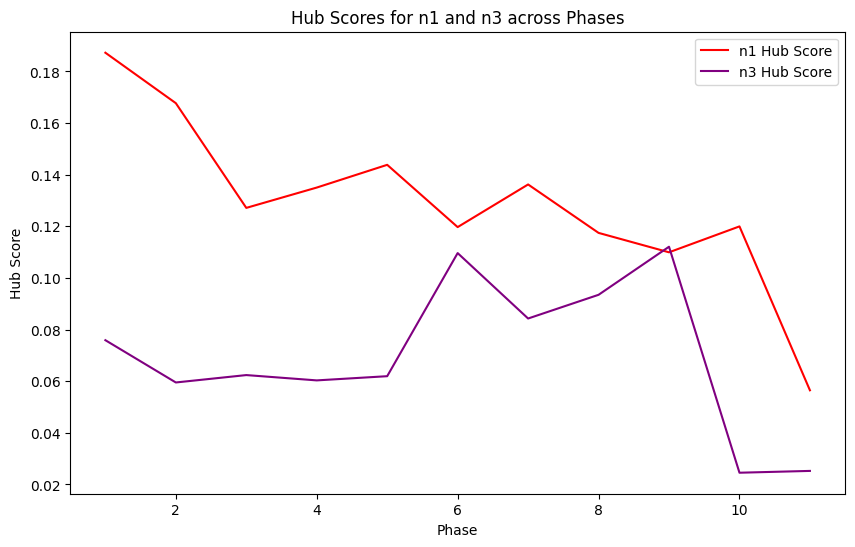

In [35]:
# prompt: now show me a line graph of the hub ascores for only n1 and n3 - color code the n1 hub score red and the n3 hub score purple solid

import matplotlib.pyplot as plt
# Extract hub scores for n1 and n3 for each phase
n1_hub_scores = []
n3_hub_scores = []
for i in range(1, 12):
  n1_hub_scores.append(hubs_authorities[i]["hubs"]["n1"])
  n3_hub_scores.append(hubs_authorities[i]["hubs"]["n3"])

# Create the line graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 12), n1_hub_scores, color="red", label="n1 Hub Score")
plt.plot(range(1, 12), n3_hub_scores, color="#800080", label="n3 Hub Score")

# Add labels and legend
plt.xlabel("Phase")
plt.ylabel("Hub Score")
plt.title("Hub Scores for n1 and n3 across Phases")
plt.legend()

# Show the plot
plt.show()


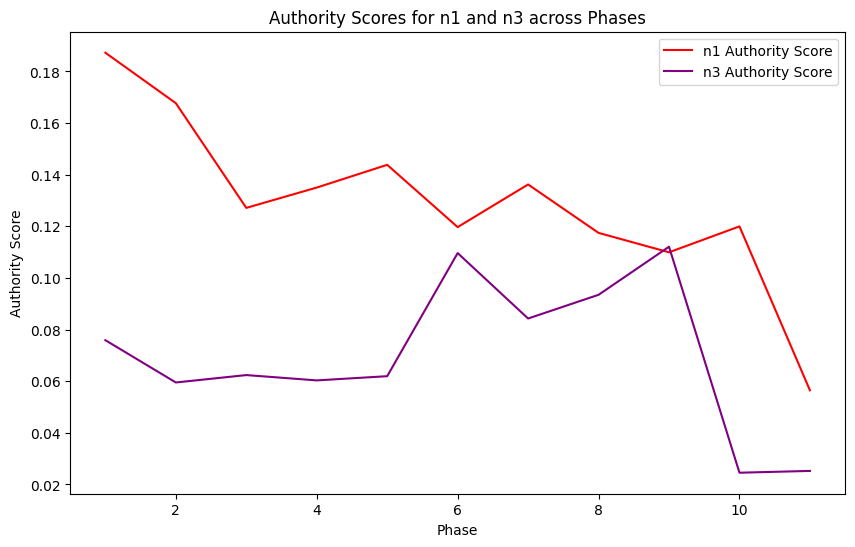

In [38]:
# prompt: now show me a line graph of the authority ascores for only n1 and n3 - color code the n1 hub score red and the n3 hub score purple solid

import matplotlib.pyplot as plt
# Extract authority scores for n1 and n3 for each phase
n1_authority_scores = []
n3_authority_scores = []
for i in range(1, 12):
  n1_authority_scores.append(hubs_authorities[i]["authorities"]["n1"])
  n3_authority_scores.append(hubs_authorities[i]["authorities"]["n3"])

# Create the line graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 12), n1_authority_scores, color="red", label="n1 Authority Score")
plt.plot(range(1, 12), n3_authority_scores, color="#800080", label="n3 Authority Score")

# Add labels and legend
plt.xlabel("Phase")
plt.ylabel("Authority Score")
plt.title("Authority Scores for n1 and n3 across Phases")
plt.legend()

# Show the plot
plt.show()


['n1', 'n4', 'n89', 'n83', 'n3', 'n5', 'n88', 'n85', 'n90', 'n2', 'n7', 'n54', 'n6', 'n64', 'n8']
[('n1', 'n4'), ('n1', 'n89'), ('n1', 'n83'), ('n1', 'n3'), ('n1', 'n5'), ('n1', 'n88'), ('n1', 'n85'), ('n1', 'n90'), ('n1', 'n2'), ('n1', 'n54'), ('n1', 'n64'), ('n1', 'n8'), ('n89', 'n7'), ('n83', 'n6'), ('n3', 'n88'), ('n88', 'n85'), ('n88', 'n6'), ('n85', 'n6')]
    phase1 phase2 phase3 phase4 phase5 phase6 phase7 phase8 phase9 phase10  \
n1       1      1      1      1      1      1      1      1      1       1   
n2       1      1      1      1      1      1      1      1      1     NaN   
n3       1      1      1      1      1      1      1      1      1       1   
n4       1    NaN      1      1      1      1      1      1    NaN       1   
n5       1      1      1      1      1      1      1    NaN    NaN     NaN   
n6       1      1      1      1      1      1      1      1      1     NaN   
n7       1      1      1      1      1    NaN    NaN    NaN      1     NaN   
n8       1 

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

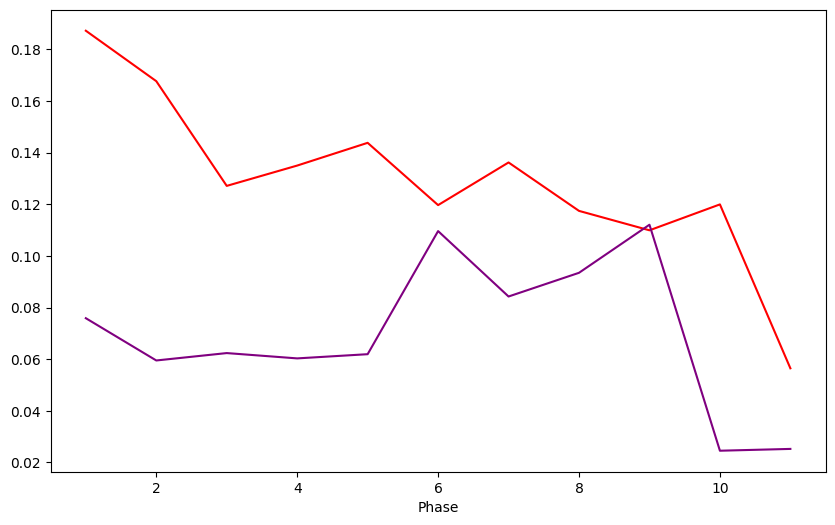

In [68]:
# prompt: how to do spectral clustering across the phases of the dataset, missing values should be filled in with zeros, pre-process data so it fits, NaN values should be changed to zero

import pandas as pd
import networkx as nx  # Import networkx as nx
import itertools
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from networkx.algorithms.link_analysis import hits
import networkx as nx

phases = {}
G = {}
for i in range(1,12):
  var_name = "phase" + str(i)
  file_name = "https://raw.githubusercontent.com/ragini30/Networks-Homework/main/" + var_name + ".csv"
  phases[i] = pd.read_csv(file_name, index_col = ["players"])
  phases[i].columns = "n" + phases[i].columns
  phases[i].index = phases[i].columns
  phases[i][phases[i] > 0] = 1
  G[i] = nx.from_pandas_adjacency(phases[i])
  G[i].name = var_name

print(G[1].nodes)
print(G[1].edges)


phases = {}
G = {}
for i in range(1,12):
  var_name = "phase" + str(i)
  file_name = "https://raw.githubusercontent.com/ragini30/Networks-Homework/main/" + var_name + ".csv"
  phases[i] = pd.read_csv(file_name, index_col = ["players"])
  phases[i].columns = "n" + phases[i].columns
  phases[i].index = phases[i].columns
  phases[i][phases[i] > 0] = 1
  G[i] = nx.from_pandas_adjacency(phases[i])
  G[i].name = var_name

nodes = sorted(G[1].nodes, key=lambda x: int(x[1:]))

phase_matrix = pd.DataFrame(columns=[f"phase{i}" for i in range(1, 12)], index=nodes)
for i in range(1, 12):
  for node in nodes:
    if node in G[i].nodes:
      phase_matrix.loc[node, f"phase{i}"] = 1
    else:
      phase_matrix.loc[node, f"phase{i}"] = np.nan

print(phase_matrix)

print(G[1])
num_nodes = len(G[i].nodes())

    # Calculate clustering coefficient
clustering_coefficient = nx.average_clustering(G[i])

    # Calculate mean centrality score (example with degree centrality)
centrality_scores = nx.degree_centrality(G[i]).values()
mean_centrality = sum(centrality_scores) / len(centrality_scores)

    # Append statistics to list
graph_stats = []
graph_stats.append({
        'Phase': var_name,
        'Number_of_nodes': num_nodes,
        'Clustering_coefficient': clustering_coefficient,
        'Mean_centrality_score': mean_centrality
    })

# Convert list of dictionaries to pandas DataFrame
df = pd.DataFrame(graph_stats)

# Display the DataFrame
print(df)
print
x = nx.betweenness_centrality(G[i], normalized = True)
formatted_output = f"G(i):\n"
# Iterate over each item in the data list
for node, betweenness_centrality in x.items():
  formatted_output += f"'{node}': {betweenness_centrality}\n"

# Print the formatted output
# Calculate betweenness centrality for Phase 9
betweenness_centrality_phase9 = nx.betweenness_centrality(G[9])

# Print results with phase number
print("Phase 9 Betweenness Centralities:")
for node, betweenness in betweenness_centrality_phase9.items():
    print(f"Node '{node}': {betweenness}")
# Iterate over each item in the data list
for node, betweenness_centrality in x.items():
  formatted_output += f"'{node}': {betweenness_centrality}\n"

# Print the formatted output
# Calculate betweenness centrality for Phase 3
betweenness_centrality_phase3 = nx.betweenness_centrality(G[3])

# Print results with phase number
print("Phase 3 Betweenness Centralities:")
for node, betweenness in betweenness_centrality_phase3.items():
    print(f"Node '{node}': {betweenness}")
x = nx.eigenvector_centrality(G[i])
formatted_output = f"G(i):\n"
# Iterate over each item in the data list
for node, eigenvector_centrality in x.items():
  formatted_output += f"'{node}': {eigenvector_centrality}\n"

# Print the formatted output
# Calculate betweenness centrality for Phase 9
eigenvector_centrality_phase9 = nx.eigenvector_centrality(G[9])

# Print results with phase number
print("Phase 9 Eiganvector Centralities:")
for node, eigenvector_centrality in eigenvector_centrality_phase9.items():
    print(f"Node '{node}': {eigenvector_centrality}")

# Iterate over each item in the data list
for node, eigenvector_centrality in x.items():
  formatted_output += f"'{node}': {eigenvector_centrality}\n"

# Print the formatted output
# Calculate betweenness centrality for Phase 3
eigenvector_centrality_phase3 = nx.eigenvector_centrality(G[3])

# Print results with phase number
print("Phase 3 Eiganvector Centralities:")
for node, eigenvector_centrality in eigenvector_centrality_phase3.items():
    print(f"Node '{node}': {eigenvector_centrality}")
# Iterate over each item in the data list
for node, eigenvector_centrality in x.items():
  formatted_output += f"'{node}': {eigenvector_centrality}\n"

# Print the formatted output
# Calculate betweenness centrality for Phase 3
eigenvector_centrality_phase5 = nx.eigenvector_centrality(G[5])

# Print results with phase number
print("Phase 5 Eiganvector Centralities:")
for node, eigenvector_centrality in eigenvector_centrality_phase5.items():
    print(f"Node '{node}': {eigenvector_centrality}")

phases = {}
G = {}
for i in range(1,12):
  var_name = "phase" + str(i)
  file_name = "https://raw.githubusercontent.com/ragini30/Networks-Homework/main/" + var_name + ".csv"
  phases[i] = pd.read_csv(file_name, index_col = ["players"])
  phases[i].columns = "n" + phases[i].columns
  phases[i].index = phases[i].columns
  phases[i][phases[i] > 0] = 1
  G[i] = nx.from_pandas_adjacency(phases[i])
  G[i].name = var_name

  create_using = nx.DiGraph()
  nx.algorithms.link_analysis.hits(G[i], max_iter=1000000)

print(G[1])
print(hits)


# Define a function to calculate hub and authority scores
def calculate_hubs_authorities(G):
  hubs, authorities = nx.hits(G)
  return hubs, authorities

# Calculate hub and authority scores for each phase
hubs_authorities = {}
for i in range(1, 12):
  hubs, authorities = calculate_hubs_authorities(G[i])
  hubs_authorities[i] = {"hubs": hubs, "authorities": authorities}

# Print the hub and authority scores for each phase
for i in range(1, 12):
  print(f"Phase {i}:")
  print(f"Hubs: {hubs_authorities[i]['hubs']}")
  print(f"Authorities: {hubs_authorities[i]['authorities']}")


# Extract hub scores for n1 and n3 for each phase
n1_hub_scores = []
n3_hub_scores = []
for i in range(1, 12):
  n1_hub_scores.append(hubs_authorities[i]["hubs"]["n1"])
  n3_hub_scores.append(hubs_authorities[i]["hubs"]["n3"])

# Create the line graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 12), n1_hub_scores, color="red", label="n1 Hub Score")
plt.plot(range(1, 12), n3_hub_scores, color="#800080", label="n3 Hub Score")

# Add labels and legend
plt.xlabel("Phase")
plt

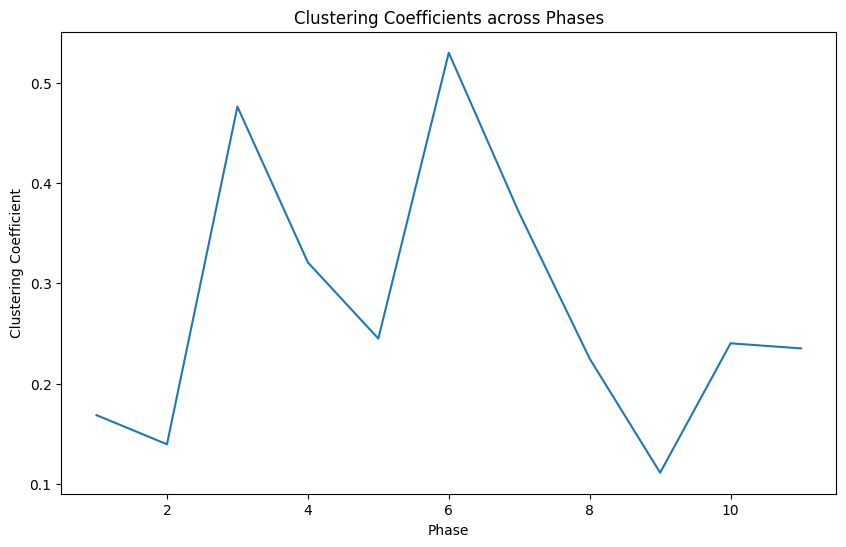

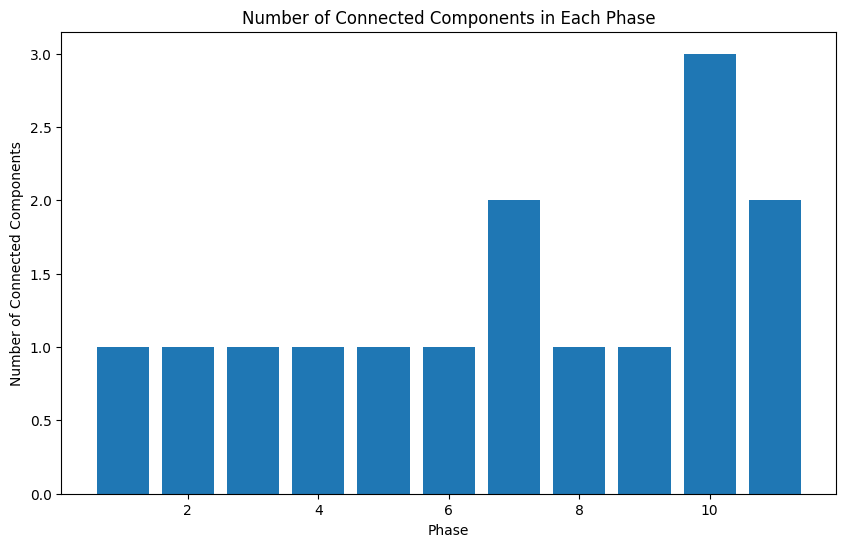

Phase 6:
frozenset({'n14', 'n17', 'n25', 'n13', 'n12', 'n31', 'n9', 'n18'})
frozenset({'n6', 'n11', 'n20', 'n82', 'n87', 'n4', 'n1'})
frozenset({'n8', 'n77', 'n3', 'n83', 'n2', 'n5'})
frozenset({'n78', 'n19', 'n76', 'n15'})
frozenset({'n84', 'n85'})
Phase 9:
frozenset({'n16', 'n14', 'n29', 'n17', 'n13', 'n12', 'n18'})
frozenset({'n90', 'n3', 'n89', 'n2', 'n85', 'n88'})
frozenset({'n78', 'n76', 'n7', 'n79', 'n101', 'n59'})
frozenset({'n8', 'n11', 'n83', 'n6', 'n1'})
frozenset({'n41', 'n87', 'n81', 'n37', 'n105'})
frozenset({'n46', 'n82', 'n96', 'n36', 'n30'})
Phase 10:
frozenset({'n8', 'n86', 'n9', 'n70', 'n85', 'n19', 'n84', 'n76', 'n3', 'n83', 'n71', 'n4', 'n1'})
frozenset({'n58', 'n22', 'n18', 'n16', 'n14', 'n17', 'n65', 'n24', 'n12'})
frozenset({'n87', 'n81', 'n40', 'n27', 'n38', 'n73', 'n21', 'n105'})
frozenset({'n41', 'n93', 'n45', 'n37', 'n44', 'n42', 'n95'})
frozenset({'n96', 'n46', 'n82'})
frozenset({'n103', 'n104'})


IndexError: list index out of range

In [71]:
# prompt: now analyse clusters across phases , if not connected then specify new clustering

# Initialize an empty dictionary to store cluster information for each phase
clusters_by_phase = {}

# Loop through each phase
for i in range(1, 12):
  # Extract the adjacency matrix for the current phase
  adjacency_matrix = nx.adjacency_matrix(G[i]).toarray()

  # Perform spectral clustering on the adjacency matrix
  clusters = SpectralClustering(n_clusters=3, affinity='precomputed').fit_predict(adjacency_matrix)

  # Store the cluster labels for the current phase
  clusters_by_phase[i] = clusters

# Check for disconnected clusters across phases
for i in range(1, 12):
  for j in range(i+1, 12):
    # Compare the clusters of two consecutive phases
    clusters_phase_i = clusters_by_phase[i]
    clusters_phase_j = clusters_by_phase[j]

    # Identify nodes that have changed clusters between phases
    changed_nodes = [node for node in clusters_phase_i if clusters_phase_i[node] != clusters_phase_j[node]]

    # If there are changed nodes, specify new clustering
    if len(changed_nodes) > 0:
      print(f"New clustering required between phases {i} and {j}:")
      print(f"Changed nodes: {changed_nodes}")



In [1]:
# prompt: now analyse clusters across phases , if not connected then specify new clustering
!pip install scikit-learn

import pandas as pd
import networkx as nx  # Import networkx as nx
import itertools
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from networkx.algorithms.link_analysis import hits
import networkx as nx
from sklearn.cluster import SpectralClustering

phases = {}
G = {}
for i in range(1,12):
  var_name = "phase" + str(i)
  file_name = "https://raw.githubusercontent.com/ragini30/Networks-Homework/main/" + var_name + ".csv"
  phases[i] = pd.read_csv(file_name, index_col = ["players"])
  phases[i].columns = "n" + phases[i].columns
  phases[i].index = phases[i].columns
  phases[i][phases[i] > 0] = 1
  G[i] = nx.from_pandas_adjacency(phases[i])
  G[i].name = var_name

# Initialize an empty dictionary to store cluster information for each phase
clusters_by_phase = {}
connected_components = {} # Initialize the connected_components dictionary

# Loop through each phase
for i in range(1, 12):
  # Extract the adjacency matrix for the current phase
  adjacency_matrix = nx.adjacency_matrix(G[i]).toarray()

  # Perform spectral clustering on the adjacency matrix
  clusters = SpectralClustering(n_clusters=3, affinity='precomputed').fit_predict(adjacency_matrix)

  # Store the cluster labels for the current phase
  clusters_by_phase[i] = clusters
  # Calculate the number of connected components
  connected_components[i] = nx.number_connected_components(G[i])

# Check for disconnected clusters across phases
for i in range(1, 12):
  for j in range(i+1, 12):
    # Compare the clusters of two consecutive phases
    clusters_phase_i = clusters_by_phase[i]
    clusters_phase_j = clusters_by_phase[j]

    # Identify nodes that have changed clusters between phases
    changed_nodes = [node for node in range(len(clusters_phase_i)) if clusters_phase_i[node] != clusters_phase_j[node]]

    # If there are changed nodes, specify new clustering
    if len(changed_nodes) > 0:
      print(f"New clustering required between phases {i} and {j}:")
      print(f"Changed nodes: {changed_nodes}")

# Check for disconnected components and perform community detection if needed
for i in range(1, 12):
  if connected_components[i] > 1:
    communities = nx.community.greedy_modularity_communities(G[i])
    print(f"Phase {i} has {connected_components[i]} connected components. Detected communities:")
    for j, community in enumerate(communities):
      print(f"Community {j+1}: {community}")

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


New clustering required between phases 1 and 2:
Changed nodes: [1, 3, 4, 5, 7, 10, 11, 12]
New clustering required between phases 1 and 3:
Changed nodes: [0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 14]
New clustering required between phases 1 and 4:
Changed nodes: [0, 1, 3, 5, 8, 10, 11, 13, 14]
New clustering required between phases 1 and 5:
Changed nodes: [2, 4, 6, 7, 8, 10, 12]
New clustering required between phases 1 and 6:
Changed nodes: [0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
New clustering required between phases 1 and 7:
Changed nodes: [2, 3, 4, 6, 7, 10, 12, 13]
New clustering required between phases 1 and 8:
Changed nodes: [0, 1, 2, 5, 8, 9, 11, 13, 14]
New clustering required between phases 1 and 9:
Changed nodes: [2, 3, 4, 6, 7, 8, 10, 12, 13, 14]
New clustering required between phases 1 and 10:
Changed nodes: [2, 3, 4, 6, 7, 10, 11, 13]
New clustering required between phases 1 and 11:
Changed nodes: [0, 1, 2, 5, 8, 10, 12, 14]
New clustering required between phases 2 and 3:
Changed 

IndexError: index 32 is out of bounds for axis 0 with size 32

In [2]:
# prompt: now analyse clusters across phases , if not connected then specify new clustering
!pip install scikit-learn

import pandas as pd
import networkx as nx  # Import networkx as nx
import itertools
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from networkx.algorithms.link_analysis import hits
import networkx as nx
from sklearn.cluster import SpectralClustering

phases = {}
G = {}
for i in range(1,12):
  var_name = "phase" + str(i)
  file_name = "https://raw.githubusercontent.com/ragini30/Networks-Homework/main/" + var_name + ".csv"
  phases[i] = pd.read_csv(file_name, index_col = ["players"])
  phases[i].columns = "n" + phases[i].columns
  phases[i].index = phases[i].columns
  phases[i][phases[i] > 0] = 1
  G[i] = nx.from_pandas_adjacency(phases[i])
  G[i].name = var_name

# Initialize an empty dictionary to store cluster information for each phase
clusters_by_phase = {}
connected_components = {} # Initialize the connected_components dictionary

# Loop through each phase
for i in range(1, 12):
  # Extract the adjacency matrix for the current phase
  adjacency_matrix = nx.adjacency_matrix(G[i]).toarray()

  # Perform spectral clustering on the adjacency matrix
  clusters = SpectralClustering(n_clusters=3, affinity='precomputed').fit_predict(adjacency_matrix)

  # Store the cluster labels for the current phase
  clusters_by_phase[i] = clusters
  # Calculate the number of connected components
  connected_components[i] = nx.number_connected_components(G[i])

# Check for disconnected clusters across phases
for i in range(1, 12):
  for j in range(i+1, 12):
    # Compare the clusters of two consecutive phases
    clusters_phase_i = clusters_by_phase[i]
    clusters_phase_j = clusters_by_phase[j]

    # Find the common nodes between the two phases
    common_nodes = set(range(len(clusters_phase_i))) & set(range(len(clusters_phase_j)))

    # Identify nodes that have changed clusters between phases, considering only common nodes
    changed_nodes = [node for node in common_nodes if clusters_phase_i[node] != clusters_phase_j[node]]

    # If there are changed nodes, specify new clustering
    if len(changed_nodes) > 0:
      print(f"New clustering required between phases {i} and {j}:")
      print(f"Changed nodes: {changed_nodes}")

# Check for disconnected components and perform community detection if needed
for i in range(1, 12):
  if connected_components[i] > 1:
    communities = nx.community.greedy_modularity_communities(G[i])
    print(f"Phase {i} has {connected_components[i]} connected components. Detected communities:")
    for j, community in enumerate(communities):
      print(f"Community {j+1}: {community}")

New clustering required between phases 1 and 2:
Changed nodes: [0, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14]
New clustering required between phases 1 and 3:
Changed nodes: [0, 1, 2, 3, 4, 5, 7, 10, 11, 14]
New clustering required between phases 1 and 4:
Changed nodes: [4, 6, 7, 9, 10, 11, 12]
New clustering required between phases 1 and 5:
Changed nodes: [2, 4, 6, 7, 8, 10, 12]
New clustering required between phases 1 and 6:
Changed nodes: [2, 3, 4, 6, 7, 11, 12, 13, 14]
New clustering required between phases 1 and 7:
Changed nodes: [0, 1, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14]
New clustering required between phases 1 and 8:
Changed nodes: [0, 1, 2, 5, 8, 10, 11, 13, 14]
New clustering required between phases 1 and 9:
Changed nodes: [0, 1, 3, 4, 5, 6, 7, 8, 9, 11, 12]
New clustering required between phases 1 and 10:
Changed nodes: [2, 3, 4, 6, 7, 11, 12, 13]
New clustering required between phases 1 and 11:
Changed nodes: [1, 3, 4, 5, 6, 7, 9, 11, 12, 13]
New clustering required between ph

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
